<a href="https://colab.research.google.com/github/ucfilho/marquesgabi_paper_fev_2021/blob/main/ANN_Ajuste_mar_2021/Fig_05_BIG_Segmentation_ann_new_abril_19_2021.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
import zipfile
#import random
from random import randint
from PIL import Image
import re
from sklearn.model_selection import train_test_split
#import scikit-image
import skimage
import pandas as pd
from sklearn.externals import joblib

/usr/local/lib/python3.7/dist-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


In [2]:
!pip install mahotas

In [3]:
import mahotas.features.texture as mht
import mahotas.features

In [4]:
!git clone https://github.com/ucfilho/marquesgabi_fev_2020 #clonar do Github
%cd marquesgabi_fev_2020
import Go2BlackWhite
import Go2Mahotas

fatal: destination path 'marquesgabi_fev_2020' already exists and is not an empty directory.
/content/marquesgabi_fev_2020


In [5]:
!git clone https://github.com/marquesgabi/Doutorado
%cd Doutorado

Transfere='Fotos_Grandes_3cdAmostra.zip'
file_name = zipfile.ZipFile(Transfere, 'r')
file_name.extractall()

fatal: destination path 'Doutorado' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado


In [6]:
Size=1200 # tamanho da foto
ww,img_name=Go2BlackWhite.BlackWhite(Transfere,Size) #Pegamos a primeira foto Grande
img=ww[0] 
# this is the big image we want to segment 
# ww[0], change it if you want to segment another picture

In [7]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines


In [8]:
from segment_filter_not_conclude import Segmenta  # got image provided segmented

In [9]:
df=Segmenta(img)


In [10]:
print(df)

    Width           0           1  ...         781         782         783
0     123   27.739044   27.918039  ...   46.047195   36.639637   10.267500
1     192   34.341576   42.615879  ...   70.638016   69.814667   66.215706
2     128   88.305664   64.293945  ...   14.578125    5.501953    0.357422
3     109   56.725784   61.233143  ...   68.439774   69.126419   68.582863
4     156  105.980278  109.698891  ...   92.598953   95.643654   99.502304
5     180   54.034077   49.392597  ...   89.325439   90.760010   93.530869
6     151   95.190781   94.920097  ...   37.152714   41.278278   60.098679
7     155   80.867142   82.379066  ...    0.000000    0.000000    0.000000
8     173  116.043037  115.965050  ...   57.682182   58.162888   56.649899
9     190   56.436005   56.431793  ...   71.992462   63.620163   57.839996
10    148   93.847343   95.349892  ...    7.861213    8.775019    8.391527
11    146   57.842178   57.309250  ...   83.422218   95.696190  100.771805
12    141  119.542374  11

In [11]:
!git clone https://github.com/ucfilho/MarquesGabi_Routines
%cd MarquesGabi_Routines
# filename = 'model_ANN.pkl'
filename = 'model_ANN_new.pkl'
model = joblib.load(filename)

fatal: destination path 'MarquesGabi_Routines' already exists and is not an empty directory.
/content/marquesgabi_fev_2020/Doutorado/MarquesGabi_Routines/MarquesGabi_Routines


In [12]:
cont = 0; num =25
img_graos = []
img=ww[0] 
while( cont < num):
  df=Segmenta(img)
  del df['Width']
  result = np.array(df)/255
  prediction = model.predict(result)
  loc_grao =[];k=0
  for i in prediction:
    if( i == 0):
      img_graos.append(df.iloc[k,:])
      cont = cont + 1
    k = k +1
img_graos = pd.DataFrame(img_graos)
print(img_graos)

           0           1           2    ...         781         782         783
10   52.153614   55.836983   56.462997  ...    0.063131    0.000000    0.000000
11   58.899529   55.064392   80.251717  ...   83.794121   84.057159   86.121918
20   96.367348  100.102036   99.040817  ...   89.448975   78.795914   71.265305
34  104.082397   98.405205  103.228394  ...    3.145600    1.654800    1.106000
40   45.214096   44.391434   43.818939  ...   79.785614   70.985687   56.098129
18   95.080406   93.077591   89.569199  ...   74.548004   76.195999   77.588394
22   91.314720   94.006531   96.937073  ...   40.911251   69.399040   91.160248
23    0.004309    0.000000    0.000000  ...   50.701141   50.680824   52.625427
41    2.914930    1.570312    0.843316  ...   68.068565   33.587669   57.006508
1    80.192047   78.666924   78.223969  ...   78.484238   74.669159   71.571884
11   85.194443  101.166664  102.888893  ...   11.000000    7.361111    6.750000
2   117.720993  112.253777  111.037872  

In [13]:
np.sum(np.array(img_graos.iloc[[1],:]))/(28*28)

112.21024558495502

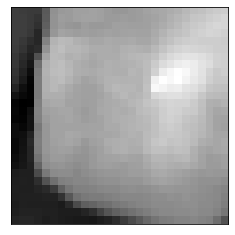

In [14]:
Size = 28
data=np.array(img_graos.iloc[[4],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

In [15]:
np.sum(np.array(img_graos.iloc[[3],:]))/(28*28)

35.99177515442003

In [16]:
img_graos.iloc[[3],:]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783
34,104.082397,98.405205,103.228394,105.922798,106.683197,121.409599,141.482391,141.834808,131.641205,118.99279,115.920403,115.927193,126.224396,40.207199,35.1884,35.284401,35.2976,33.231602,27.826401,17.562397,13.362,14.053201,12.653199,12.6984,14.191999,15.195201,7.5152,0.3456,98.54921,96.452812,99.931198,106.327614,107.403603,117.533592,128.161194,127.571602,121.410805,109.845207,109.130814,111.75,...,0.386,0.4,0.4,0.4,0.218,0.316,0.288,0.4,0.33,0.1472,0.084,0.0,5.62,5.8496,6.3312,5.102,5.3792,5.4212,5.6312,5.242,5.499599,4.6764,4.4468,4.6764,4.2284,4.08,4.5448,4.696,4.22,4.57,4.64,4.64,4.9984,5.018,4.318,4.1304,3.856,3.1456,1.6548,1.106


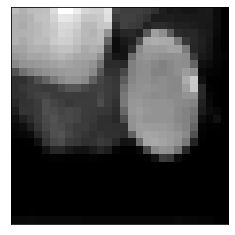

In [17]:
data=np.array(img_graos.iloc[[3],:]).reshape(Size,Size)
img = Image.fromarray(data.astype('uint8'), mode='L')
img=np.float32(img)

img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
Foto=np.array(img28).reshape(28,28)
plt.xticks([])
plt.yticks([])
plt.grid(False)
plt.imshow(Foto, cmap = "gray")

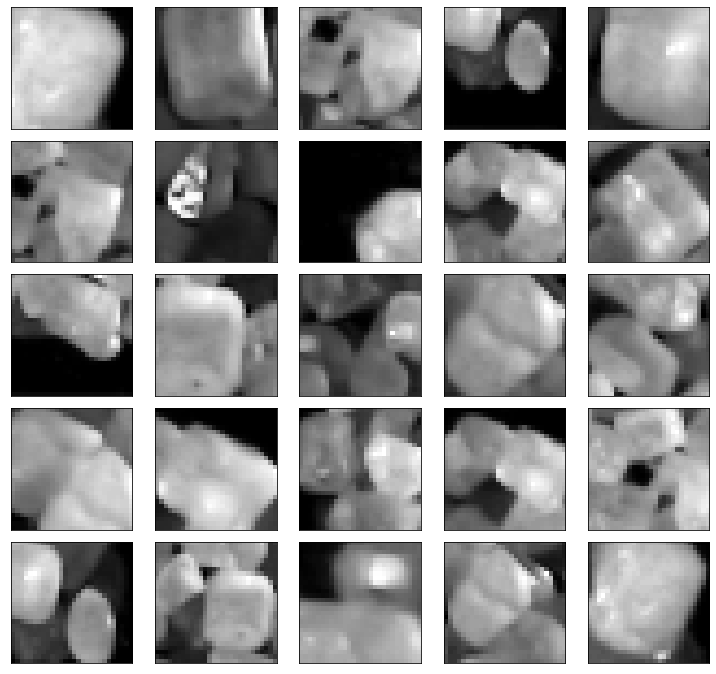

In [18]:
Num = 25
Size=28
Picture_Size = 25
fig = plt.gcf()
fig.set_size_inches(Picture_Size, Picture_Size)
for i in range(Num):
  data=np.array(img_graos.iloc[i,:]).reshape(Size,Size)
  img = Image.fromarray(data.astype('uint8'), mode='L')
  img=np.float32(img)

  img28=cv2.resize(img,(Size,Size), interpolation = cv2.INTER_AREA)
  Foto=np.array(img28).reshape(28,28)
  plt.subplot(25,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(Foto, cmap = "gray")
  #plt.xlabel(i)

plt.subplots_adjust(bottom=0.15,left=0.4, right=0.8, top=2,hspace=0.1, wspace=0.01)
#plt.subplots_adjust(bottom=0.2, right=2, top=3,hspace=0.4, wspace=0.4)

In [19]:
print(np.random.rand(1,3))

[[0.24882262 0.68330017 0.43261605]]
